# Final Project: Gender Pay Gap

DSC 530  

Jahedur Rahman  

In [1]:
from __future__ import print_function, division

%matplotlib inline

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import analytic
import random

import thinkstats2
import thinkplot

import scipy.stats as stats

## Import and Clean Data Set

In [2]:
# Read dataset and into data frame
original_glassdoor_df = pd.read_csv('Glassdoor-Gender-Pay-Gap.csv')

In [3]:
original_glassdoor_df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [4]:
original_glassdoor_df.Gender[original_glassdoor_df.Gender == 'Male'] = 0
original_glassdoor_df.Gender[original_glassdoor_df.Gender == 'Female'] = 1

C:\Users\jahed\AppData\Local\Temp/ipykernel_11032/2496018196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_glassdoor_df.Gender[original_glassdoor_df.Gender == 'Male'] = 0
C:\Users\jahed\AppData\Local\Temp/ipykernel_11032/2496018196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_glassdoor_df.Gender[original_glassdoor_df.Gender == 'Female'] = 1


In [5]:
original_glassdoor_df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,1,18,5,College,Operations,2,42363,9938
1,Software Engineer,0,21,5,College,Management,5,108476,11128
2,Warehouse Associate,1,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,0,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,0,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,1,61,1,High School,Administration,1,62644,3270
996,Data Scientist,0,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,0,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,0,65,2,High School,Administration,1,97376,2225


In [6]:
original_glassdoor_df.Education[original_glassdoor_df.Education == 'High School'] = 0
original_glassdoor_df.Education[original_glassdoor_df.Education == 'College'] = 1
original_glassdoor_df.Education[original_glassdoor_df.Education == 'Masters'] = 2
original_glassdoor_df.Education[original_glassdoor_df.Education == 'PhD'] = 3

C:\Users\jahed\AppData\Local\Temp/ipykernel_11032/2364364921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_glassdoor_df.Education[original_glassdoor_df.Education == 'High School'] = 0
C:\Users\jahed\AppData\Local\Temp/ipykernel_11032/2364364921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_glassdoor_df.Education[original_glassdoor_df.Education == 'College'] = 1
C:\Users\jahed\AppData\Local\Temp/ipykernel_11032/2364364921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [7]:
original_glassdoor_df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,1,18,5,1,Operations,2,42363,9938
1,Software Engineer,0,21,5,1,Management,5,108476,11128
2,Warehouse Associate,1,19,4,3,Administration,5,90208,9268
3,Software Engineer,0,20,5,2,Sales,4,108080,10154
4,Graphic Designer,0,26,5,2,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,1,61,1,0,Administration,1,62644,3270
996,Data Scientist,0,57,1,2,Sales,2,108977,3567
997,Financial Analyst,0,48,1,0,Operations,1,92347,2724
998,Financial Analyst,0,65,2,0,Administration,1,97376,2225


In [8]:
original_glassdoor_df.Dept[original_glassdoor_df.Dept == 'Sales'] = 0
original_glassdoor_df.Dept[original_glassdoor_df.Dept == 'Operations'] = 1
original_glassdoor_df.Dept[original_glassdoor_df.Dept == 'Administration'] = 2
original_glassdoor_df.Dept[original_glassdoor_df.Dept == 'Management'] = 3
original_glassdoor_df.Dept[original_glassdoor_df.Dept == 'Engineering'] = 4

C:\Users\jahed\AppData\Local\Temp/ipykernel_11032/3172788235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_glassdoor_df.Dept[original_glassdoor_df.Dept == 'Sales'] = 0
C:\Users\jahed\AppData\Local\Temp/ipykernel_11032/3172788235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_glassdoor_df.Dept[original_glassdoor_df.Dept == 'Operations'] = 1
C:\Users\jahed\AppData\Local\Temp/ipykernel_11032/3172788235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [9]:
original_glassdoor_df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,1,18,5,1,1,2,42363,9938
1,Software Engineer,0,21,5,1,3,5,108476,11128
2,Warehouse Associate,1,19,4,3,2,5,90208,9268
3,Software Engineer,0,20,5,2,0,4,108080,10154
4,Graphic Designer,0,26,5,2,4,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,1,61,1,0,2,1,62644,3270
996,Data Scientist,0,57,1,2,0,2,108977,3567
997,Financial Analyst,0,48,1,0,1,1,92347,2724
998,Financial Analyst,0,65,2,0,2,1,97376,2225


In [10]:
glassdoor_df = original_glassdoor_df.loc[:, ['Gender', 'Age', 'Education', 'Dept', 'Seniority', 'BasePay']]

In [11]:
glassdoor_df

,Gender,Age,Education,Dept,Seniority,BasePay
0,1,18,1,1,2,42363
1,0,21,1,3,5,108476
2,1,19,3,2,5,90208
3,0,20,2,0,4,108080
4,0,26,2,4,5,99464
...,...,...,...,...,...,...
995,1,61,0,2,1,62644
996,0,57,2,0,2,108977
997,0,48,0,1,1,92347
998,0,65,0,2,1,97376


## Histograms for the 6 variables

### Gender Histogram

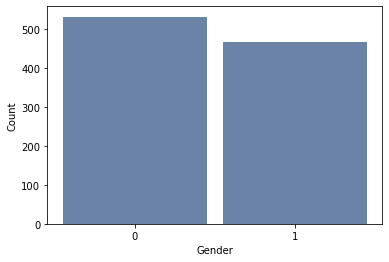

In [12]:
gender_hist = thinkstats2.Hist(glassdoor_df.Gender)
thinkplot.Hist(gender_hist)
thinkplot.Config(xlabel='Gender', ylabel='Count', xticks=np.arange(0, 2))

In [13]:
glassdoor_df['Gender'].describe()

count     1000
unique       2
top          0
freq       532
Name: Gender, dtype: int64

In [14]:
glassdoor_df['Gender'].mode()

0    0
dtype: object

In [15]:
glassdoor_df['Gender'].skew()

0.12845571598007238

In [16]:
glassdoor_df['Gender'].value_counts()

0    532
1    468
Name: Gender, dtype: int64

### Age Histogram

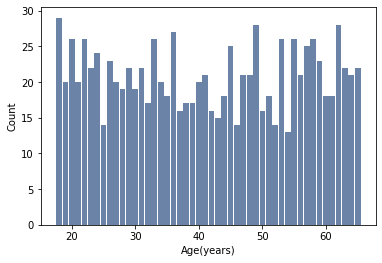

In [17]:
age_hist = thinkstats2.Hist(glassdoor_df.Age)
thinkplot.Hist(age_hist)
thinkplot.Config(xlabel='Age(years)', ylabel='Count')

In [18]:
glassdoor_df['Age'].describe()

count    1000.000000
mean       41.393000
std        14.294856
min        18.000000
25%        29.000000
50%        41.000000
75%        54.250000
max        65.000000
Name: Age, dtype: float64

In [19]:
glassdoor_df['Age'].mode()

0    18
dtype: int64

In [20]:
glassdoor_df['Age'].skew()

-0.0038646671280158015

### Education Histogram

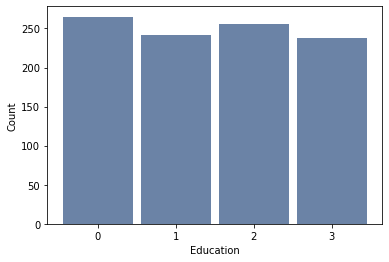

In [21]:
education_hist = thinkstats2.Hist(glassdoor_df.Education)
thinkplot.Hist(education_hist)
thinkplot.Config(xlabel='Education', ylabel='Count', xticks=np.arange(0, 4))

In [22]:
glassdoor_df['Education'].describe()

count     1000
unique       4
top          0
freq       265
Name: Education, dtype: int64

In [23]:
glassdoor_df['Education'].mode()

0    0
dtype: object

In [24]:
glassdoor_df['Education'].skew()

0.024950274024523964

In [25]:
glassdoor_df['Education'].value_counts()

0    265
2    256
1    241
3    238
Name: Education, dtype: int64

### Department Histogram

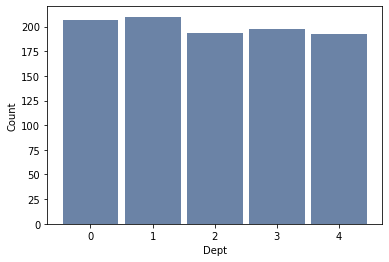

In [26]:
dept_hist = thinkstats2.Hist(glassdoor_df.Dept)
thinkplot.Hist(dept_hist)
thinkplot.Config(xlabel='Dept', ylabel='Count')

In [27]:
glassdoor_df['Dept'].describe()

count     1000
unique       5
top          1
freq       210
Name: Dept, dtype: int64

In [28]:
glassdoor_df['Dept'].mode()

0    1
dtype: object

In [29]:
glassdoor_df['Dept'].skew()

0.042544792991636354

In [30]:
glassdoor_df['Dept'].value_counts()

1    210
0    207
3    198
2    193
4    192
Name: Dept, dtype: int64

### Seniority Histogram

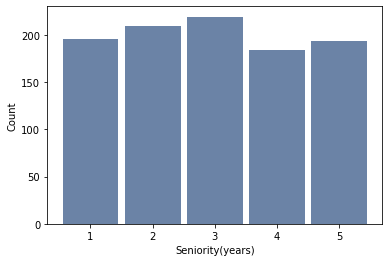

In [31]:
seniority_hist = thinkstats2.Hist(glassdoor_df.Seniority)
thinkplot.Hist(seniority_hist)
thinkplot.Config(xlabel='Seniority(years)', ylabel='Count')

In [32]:
glassdoor_df['Seniority'].describe()

count    1000.000000
mean        2.971000
std         1.395029
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Seniority, dtype: float64

In [33]:
glassdoor_df['Seniority'].mode()

0    3
dtype: int64

In [34]:
glassdoor_df['Seniority'].skew()

0.047350886612282636

In [35]:
glassdoor_df['Dept'].value_counts()

1    210
0    207
3    198
2    193
4    192
Name: Dept, dtype: int64

### BasePay Histogram

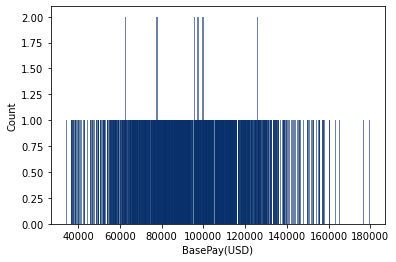

In [36]:
basepay_hist = thinkstats2.Hist(glassdoor_df.BasePay)
thinkplot.Hist(basepay_hist, width=500)
thinkplot.Config(xlabel='BasePay(USD)', ylabel='Count')

(array([ 16.,  14.,  29.,  54.,  73.,  78.,  98., 120., 101., 112.,  91.,
         69.,  56.,  40.,  18.,  11.,  14.,   3.,   1.,   2.]),
 array([ 34208. ,  41483.9,  48759.8,  56035.7,  63311.6,  70587.5,
         77863.4,  85139.3,  92415.2,  99691.1, 106967. , 114242.9,
        121518.8, 128794.7, 136070.6, 143346.5, 150622.4, 157898.3,
        165174.2, 172450.1, 179726. ]),
 <BarContainer object of 20 artists>)

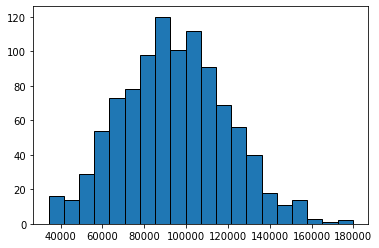

In [37]:
# thinkplot.Hist is not showing the histogram correctly, so using pyplot hist for BasePay
plt.hist(glassdoor_df['BasePay'], bins=20, edgecolor='black')

In [38]:
glassdoor_df['BasePay'].describe()

count      1000.000000
mean      94472.653000
std       25337.493272
min       34208.000000
25%       76850.250000
50%       93327.500000
75%      111558.000000
max      179726.000000
Name: BasePay, dtype: float64

In [39]:
glassdoor_df['BasePay'].mode()

0     62753
1     77584
2     77793
3     95795
4     97376
5     99543
6    100183
7    125770
dtype: int64

In [40]:
glassdoor_df['BasePay'].skew()

0.16647199939504242

## PMF

In [41]:
glassdoor_df_male = glassdoor_df[glassdoor_df.Gender == 0]
glassdoor_df_female = glassdoor_df[glassdoor_df.Gender == 1]

In [42]:
glassdoor_df_male

,Gender,Age,Education,Dept,Seniority,BasePay
1,0,21,1,3,5,108476
3,0,20,2,0,4,108080
4,0,26,2,4,5,99464
7,0,18,3,4,5,97523
10,0,24,3,4,5,102261
...,...,...,...,...,...,...
988,0,62,2,2,2,102593
996,0,57,2,0,2,108977
997,0,48,0,1,1,92347
998,0,65,0,2,1,97376


In [43]:
glassdoor_df_female

,Gender,Age,Education,Dept,Seniority,BasePay
0,1,18,1,1,2,42363
2,1,19,3,2,5,90208
5,1,20,3,1,4,70890
6,1,20,1,0,4,67585
8,1,33,0,4,5,112976
...,...,...,...,...,...,...
991,1,65,2,2,1,106945
992,1,63,1,2,2,81545
993,1,65,2,2,1,80789
994,1,64,3,2,2,85253


In [44]:
# Create histogram/pmf of Seniority for males
seniority_hist_male = thinkstats2.Hist(glassdoor_df_male)
seniority_pmf_male = thinkstats2.Pmf(glassdoor_df_male.Seniority, label='Male')

# Create histogram/pmf of Seniority for females
seniority_hist_female = thinkstats2.Hist(glassdoor_df_female)
seniority_pmf_female = thinkstats2.Pmf(glassdoor_df_female.Seniority, label='Female')

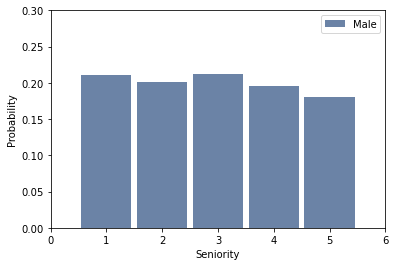

In [45]:
thinkplot.Hist(seniority_pmf_male)
thinkplot.Config(xlabel='Seniority', ylabel='Probability', axis =[0, 6, 0, .3])

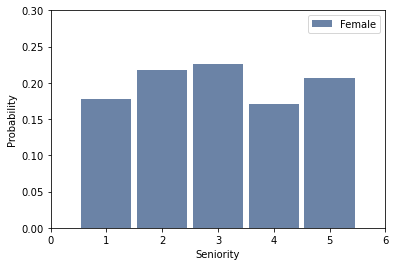

In [46]:
thinkplot.Hist(seniority_pmf_female)
thinkplot.Config(xlabel='Seniority', ylabel='Probability', axis =[0, 6, 0, .3])

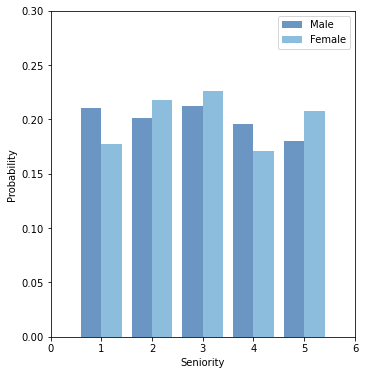

In [47]:
# Plot PMF together for better comparison
width = .4
axis =[0, 6, 0, .3]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(seniority_pmf_male, align='right', width = width, label = "Male")
thinkplot.Hist(seniority_pmf_female, align='left', width = width, label = "Female")
thinkplot.Config(xlabel='Seniority', ylabel='Probability', axis = axis )

In [48]:
# Create histogram/pmf of Education for males
education_hist_male = thinkstats2.Hist(glassdoor_df_male)
education_pmf_male = thinkstats2.Pmf(glassdoor_df_male.Education, label='Male')

# Create histogram/pmf of Education for females
education_hist_female = thinkstats2.Hist(glassdoor_df_female)
education_pmf_female = thinkstats2.Pmf(glassdoor_df_female.Education, label='Female')

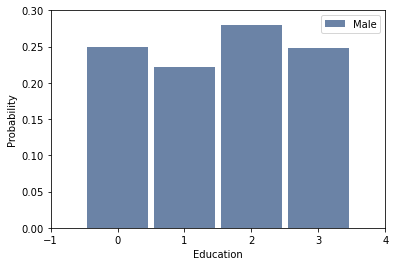

In [49]:
thinkplot.Hist(education_pmf_male)
thinkplot.Config(xlabel='Education', ylabel='Probability', axis = [-1, 4, 0, .3])

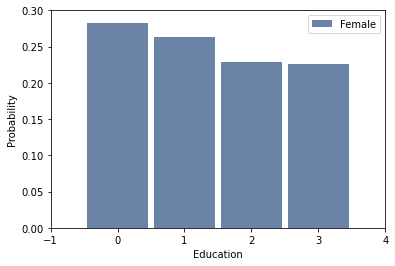

In [50]:
thinkplot.Hist(education_pmf_female)
thinkplot.Config(xlabel='Education', ylabel='Probability', axis = [-1, 4, 0, .3])

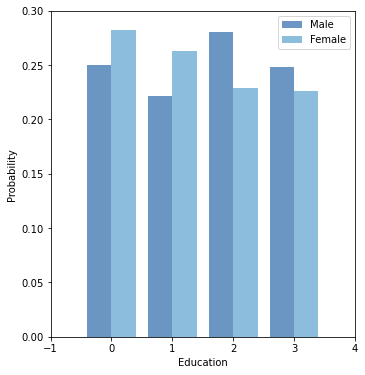

In [51]:
# Plot PMF together for better comparison
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(education_pmf_male, align='right', width = 0.4, label = "Male")
thinkplot.Hist(education_pmf_female, align='left', width = 0.4, label = "Female")
thinkplot.Config(xlabel='Education', ylabel='Probability', axis = [-1, 4, 0, .3])

## CDF

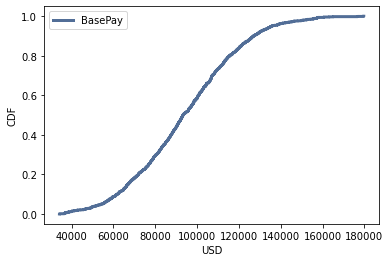

<Figure size 576x432 with 0 Axes>

In [52]:
cdf = thinkstats2.Cdf(glassdoor_df['BasePay'], label = 'BasePay')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = 'USD', ylabel = 'CDF')

## Normal Probability Plot

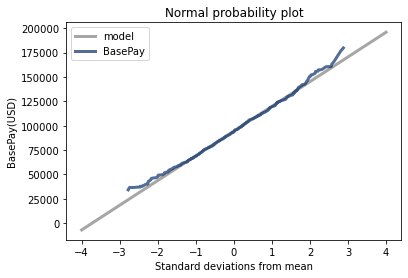

In [53]:
mean = glassdoor_df['BasePay'].mean()
std = glassdoor_df['BasePay'].std()

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
thinkplot.Plot(fxs, fys, color='gray', label='model')

xs, ys = thinkstats2.NormalProbability(glassdoor_df['BasePay'])
thinkplot.Plot(xs, ys, label='BasePay')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='BasePay(USD)')

## Scatter Plots

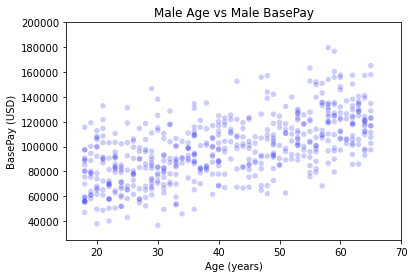

In [54]:
# comparing male Age and male BasePay
thinkplot.Scatter(glassdoor_df_male.Age, glassdoor_df_male.BasePay)
thinkplot.Config(title='Male Age vs Male BasePay', 
                 xlabel='Age (years)', 
                 ylabel='BasePay (USD)', 
                 axis=[15, 70, 25000, 200000])

In [55]:
glassdoor_df_male.describe()

,Age,Seniority,BasePay
count,532.000000,532.000000,532.000000
mean,41.009398,2.934211,98457.545113
std,14.715184,1.399958,25517.520327
min,18.000000,1.000000,36642.000000
25%,28.000000,2.000000,81452.500000
50%,40.000000,3.000000,98223.000000
75%,55.000000,4.000000,115606.250000
max,65.000000,5.000000,179726.000000


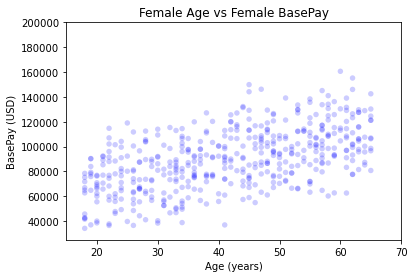

In [56]:
# comparing female Age and female BasePay
thinkplot.Scatter(glassdoor_df_female.Age, glassdoor_df_female.BasePay)
thinkplot.Config(title='Female Age vs Female BasePay', 
                 xlabel='Age (years)', 
                 ylabel='BasePay (USD)', 
                 axis=[15, 70, 25000, 200000])

In [57]:
glassdoor_df_female.describe()

,Age,Seniority,BasePay
count,468.000000,468.000000,468.000000
mean,41.829060,3.012821,89942.818376
std,13.804254,1.389717,24378.277510
min,18.000000,1.000000,34208.000000
25%,30.000000,2.000000,73186.250000
50%,42.000000,3.000000,89913.500000
75%,54.000000,4.000000,106923.250000
max,65.000000,5.000000,160614.000000


### Correlation & Covariance

In [58]:
glassdoor_df_male.corr()

,Age,Seniority,BasePay
Age,1.000000,-0.006735,0.598388
Seniority,-0.006735,1.000000,0.488566
BasePay,0.598388,0.488566,1.000000


In [59]:
glassdoor_df_female.corr()

,Age,Seniority,BasePay
Age,1.000000,-0.041185,0.547373
Seniority,-0.041185,1.000000,0.565459
BasePay,0.547373,0.565459,1.000000


In [60]:
glassdoor_df_male.cov()

,Age,Seniority,BasePay
Age,216.536635,-0.138740,2.246917e+05
Seniority,-0.138740,1.959882,1.745328e+04
BasePay,224691.710498,17453.278868,6.511438e+08


In [61]:
glassdoor_df_female.cov()

,Age,Seniority,BasePay
Age,190.557441,-0.790095,1.842042e+05
Seniority,-0.790095,1.931313,1.915712e+04
BasePay,184204.170171,19157.120107,5.943004e+08


### Pearson's Correlation

In [62]:
thinkstats2.Corr(glassdoor_df_male.Age, glassdoor_df_male.BasePay)

0.598388019151478

In [63]:
thinkstats2.Corr(glassdoor_df_female.Age, glassdoor_df_female.BasePay)

0.5473731441675206

## Hypothesis Testing

In [64]:
glassdoor_df_male.BasePay.mean()

98457.54511278195

In [65]:
glassdoor_df_female.BasePay.mean()

89942.81837606838

In [66]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [67]:
data = glassdoor_df_male.BasePay.values, glassdoor_df_female.BasePay.values

In [68]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

## Multiple Regression Analysis

In [69]:
formula = 'BasePay ~ Age'
results = smf.ols(formula, data=glassdoor_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BasePay   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     462.4
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.41e-84
Time:                        11:13:39   Log-Likelihood:                -11368.
No. Observations:                1000   AIC:                         2.274e+04
Df Residuals:                     998   BIC:                         2.275e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.319e+04   2031.060     26.188      0.000    4.92e+04    5.72e+04
Age          997.3471     46.382     21.503      0.000     906.329    1088.365
==============================================================================
Omnibus:                        6.938   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.038
Skew:                           0.195   Prob(JB):                       0.0296
Kurtosis:                       2.870   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
formula = 'BasePay ~ Age + Education'
results = smf.ols(formula, data=glassdoor_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BasePay   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     130.0
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           2.40e-89
Time:                        11:13:39   Log-Likelihood:                -11348.
No. Observations:                1000   AIC:                         2.271e+04
Df Residuals:                     995   BIC:                         2.273e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.796e+04   2259.176     21.230      0.000    4.35e+04    5.24e+04
Education[T.1]  3391.3493   1831.336      1.852      0.064    -202.375    6985.074
Education[T.2]  8437.0823   1803.125      4.679      0.000    4898.718     1.2e+04
Education[T.3]  1.044e+04   1837.656      5.683      0.000    6837.979    1.41e+04
Age              991.6263     45.547     21.772      0.000     902.248    1081.005
==============================================================================
Omnibus:                        6.598   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.689
Skew:                           0.189   Prob(JB):                       0.0353
Kurtosis:                       2.869   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
formula = 'BasePay ~ Age + Education + Dept'
results = smf.ols(formula, data=glassdoor_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BasePay   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     68.64
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.25e-89
Time:                        11:13:39   Log-Likelihood:                -11338.
No. Observations:                1000   AIC:                         2.269e+04
Df Residuals:                     991   BIC:                         2.274e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.998e+04   2607.417     19.169      0.000    4.49e+04    5.51e+04
Education[T.1]  3538.5216   1818.023      1.946      0.052     -29.094    7106.138
Education[T.2]  8568.0472   1789.724      4.787      0.000    5055.963    1.21e+04
Education[T.3]  1.051e+04   1823.364      5.761      0.000    6926.994    1.41e+04
Dept[T.1]      -6569.0403   1999.995     -3.285      0.001   -1.05e+04   -2644.328
Dept[T.2]      -4279.9648   2045.201     -2.093      0.037   -8293.387    -266.543
Dept[T.3]        314.5441   2030.129      0.155      0.877   -3669.302    4298.390
Dept[T.4]        533.3599   2048.615      0.260      0.795   -3486.761    4553.481
Age              990.1698     45.243     21.886      0.000     901.388    1078.952
==============================================================================
Omnibus:                        5.325   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                5.216
Skew:                           0.147   Prob(JB):                       0.0737
Kurtosis:                       2.804   Cond. No.                         248.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
formula = 'BasePay ~ Age + Education + Dept + Seniority'
results = smf.ols(formula, data=glassdoor_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BasePay   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     179.8
Date:                Fri, 04 Mar 2022   Prob (F-statistic):          2.35e-201
Time:                        11:13:39   Log-Likelihood:                -11074.
No. Observations:                1000   AIC:                         2.217e+04
Df Residuals:                     990   BIC:                         2.222e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.346e+04   2244.039     10.454      0.000    1.91e+04    2.79e+04
Education[T.1]  1697.9017   1398.697      1.214      0.225   -1046.850    4442.653
Education[T.2]  7037.1283   1376.430      5.113      0.000    4336.073    9738.184
Education[T.3]  8571.8956   1402.977      6.110      0.000    5818.746    1.13e+04
Dept[T.1]      -5582.1141   1537.222     -3.631      0.000   -8598.702   -2565.526
Dept[T.2]      -6286.7890   1573.357     -3.996      0.000   -9374.287   -3199.291
Dept[T.3]       -529.3290   1560.247     -0.339      0.734   -3591.101    2532.443
Dept[T.4]      -1845.2613   1576.728     -1.170      0.242   -4939.374    1248.852
Age             1007.3788     34.770     28.973      0.000     939.148    1075.610
Seniority       9394.0315    358.017     26.239      0.000    8691.473    1.01e+04
==============================================================================
Omnibus:                       29.662   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.522
Skew:                           0.423   Prob(JB):                     1.43e-07
Kurtosis:                       3.199   Cond. No.                         253.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
formula = 'BasePay ~ Age + Education + Dept + Seniority + Gender'
results = smf.ols(formula, data=glassdoor_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BasePay   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     188.8
Date:                Fri, 04 Mar 2022   Prob (F-statistic):          2.30e-221
Time:                        11:13:39   Log-Likelihood:                -11025.
No. Observations:                1000   AIC:                         2.207e+04
Df Residuals:                     989   BIC:                         2.213e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.773e+04   2177.934     12.732      0.000    2.35e+04     3.2e+04
Education[T.1]  1793.0253   1331.896      1.346      0.179    -820.641    4406.691
Education[T.2]  6234.4007   1313.047      4.748      0.000    3657.722    8811.080
Education[T.3]  8036.8621   1336.979      6.011      0.000    5413.220    1.07e+04
Dept[T.1]      -5837.7249   1463.985     -3.988      0.000   -8710.599   -2964.850
Dept[T.2]      -6241.2318   1498.183     -4.166      0.000   -9181.215   -3301.248
Dept[T.3]      -1005.0534   1486.434     -0.676      0.499   -3921.980    1911.873
Dept[T.4]      -2042.6704   1501.513     -1.360      0.174   -4989.188     903.847
Gender[T.1]    -9640.5062    950.592    -10.142      0.000   -1.15e+04   -7775.097
Age             1017.4944     33.123     30.718      0.000     952.494    1082.495
Seniority       9497.7014    341.063     27.847      0.000    8828.412    1.02e+04
==============================================================================
Omnibus:                       26.513   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.935
Skew:                           0.403   Prob(JB):                     8.59e-07
Kurtosis:                       3.143   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
formula = 'BasePay ~ Age + Seniority + Gender'
results = smf.ols(formula, data=glassdoor_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BasePay   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     565.4
Date:                Fri, 04 Mar 2022   Prob (F-statistic):          1.72e-214
Time:                        11:13:39   Log-Likelihood:                -11061.
No. Observations:                1000   AIC:                         2.213e+04
Df Residuals:                     996   BIC:                         2.215e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.812e+04   1879.700     14.960      0.000    2.44e+04    3.18e+04
Gender[T.1] -1.011e+04    978.965    -10.330      0.000    -1.2e+04   -8191.346
Age          1027.5395     34.183     30.060      0.000     960.460    1094.619
Seniority    9610.1644    350.269     27.437      0.000    8922.815    1.03e+04
==============================================================================
Omnibus:                       29.350   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.179
Skew:                           0.418   Prob(JB):                     1.70e-07
Kurtosis:                       3.222   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""